In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sc
from scipy import optimize
from scipy.optimize import curve_fit
from IPython.display import display
import sympy as sp

plt.rcParams['text.usetex'] = True

#plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-bright')

In [2]:
c = sc.constants.c # speed of light [m/s]
h = sc.constants.h # Planck's constant [J.s]
k = sc.constants.k # Boltzmann constant [J/K]

c1 = 3.7415e-4   # [W μm^4 m^-2]
c2 = 1.4388e4   # [μm·K]

### search binary function

In [3]:
def se_binary(Eq,x0,x1,accuracy=1e-6):
    error = 6.02e23
    x = [x0,x1]
    while Eq(x[0])*Eq(x[0]) < 0: print('nope :)')
    while error > accuracy:
        mid = (x[0]+x[1]) / 2
        if Eq(mid)*Eq(x[0]) >0:
            x[0] = mid
        else: x[1] = mid
        error = abs(x[1]-x[0])
    epsilon = (x[0]+x[1]) / 2
    return epsilon

# 1. Exact research on the theory of the blackbody thermal radiation (Part 1)

$$ e_b(\lambda, T) = C_1 \lambda^{-5} (e^{\frac{C_2}{\lambda T}} - 1)^{-1} $$

$$ \frac{\partial e_b(\lambda, T)}{\partial \lambda} = 0 $$

convert to wiens law with sympy

In [4]:
Lamda,T, x, C1,C2= sp.symbols('lamda T x C1 C2',real=True,positive=True)
eb = C1*Lamda**(-5) / (sp.exp(C2/(Lamda*T)) - 1)
d_eb = sp.diff(eb,Lamda)
display(sp.simplify(d_eb))
main = (sp.simplify(d_eb).as_numer_denom()[0])/C1
display(main)
# x = C2/(Lamda*T)
eq1 = main.subs(C2 / (Lamda*T),x)
display(eq1)
eq2 = sp.factor(eq1.subs(T*Lamda,C2/x),C2)* x/C2
display(eq2)
eq3 = eq2.subs(-5*sp.exp(x)+5,sp.factor(-5*sp.exp(x)+5))
display(eq3)

C1*(C2*exp(C2/(T*lamda)) + 5*T*lamda*(1 - exp(C2/(T*lamda))))/(T*lamda**7*(1 - exp(C2/(T*lamda)))**2)

C2*exp(C2/(T*lamda)) + 5*T*lamda*(1 - exp(C2/(T*lamda)))

C2*exp(x) + 5*T*lamda*(1 - exp(x))

x*exp(x) - 5*exp(x) + 5

x*exp(x) - 5*(exp(x) - 1)

$ x e^x - 5(e^x -1)=0 \\ $
$ 5(e^x -1) = xe^x ,\quad x = \frac{C_2}{\lambda T} $

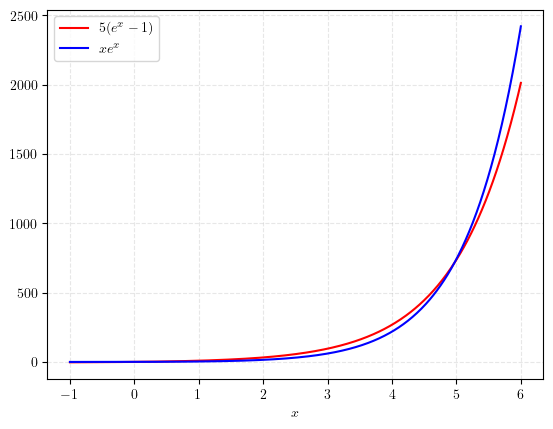

In [5]:
x = np.linspace(-1,6,500)
f_eqs = [5*(np.exp(x) - 1),x*np.exp(x)]
#plt.figure(dpi=250)
plt.plot(x,f_eqs[0],label=r'$5(e^x - 1)$',color='red')
plt.plot(x,f_eqs[1],label=r'$xe^x$',color='blue')
plt.xlabel(r'$x$')
plt.legend()
plt.grid(True,alpha=0.3,linestyle='--')

1. optimize newton

In [6]:
x = np.linspace(-7,7,500)

def f(x): return 5*(np.exp(x) - 1) - x*np.exp(x)
x_greiner = np.round(optimize.newton(f,5),6)
lambda_T_newton = c2/x_greiner
print(f'newton method: {x_greiner:4f}')
print(f'wien\'s law: {lambda_T_newton:4f} um.K')

newton method: 4.965114
wien's law: 2897.818660 um.K


## This is not complete

(-100.0, 100.0)

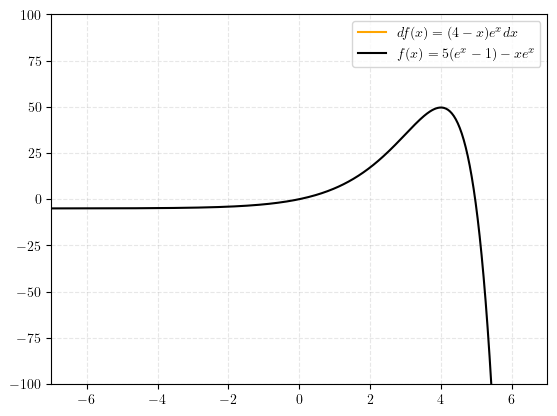

In [7]:
def f_diff(x): return (4-x)*np.exp(x)

plt.plot(3,f_diff(3),label=r'$df(x) = (4-x)e^x dx$',color='orange')
plt.plot(x,f(x),label=r'$f(x) = 5(e^x - 1) - xe^x$',color='black')
plt.grid(True,alpha=0.3,linestyle='--')
plt.legend()
plt.xlim(-7,7)
plt.ylim(-100,100)

2. binary search (of Neuman exercises)

In [8]:
lambda_T_binary= c2/se_binary(f,1,10)
print(f'binary method: {se_binary(f,1,10):.4f}')
print(f'wien\'s law: {lambda_T_binary:.4f} um.K')

binary method: 4.9651
wien's law: 2897.8186 um.K


3. image method: 4.9301582

Text(0.5, 0, '$x$')

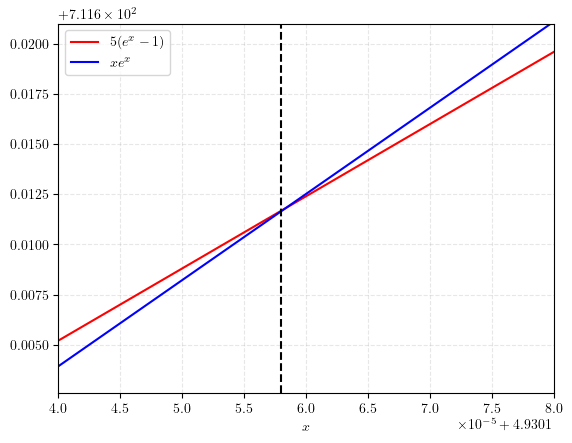

In [9]:
#plt.figure(dpi=250)
plt.plot(x,f_eqs[0],label=r'$5(e^x - 1)$',color='red')
plt.plot(x,f_eqs[1],label=r'$xe^x$',color='blue')
plt.grid(True,alpha=0.3,linestyle='--')
plt.ylim(711.6026,711.621)
plt.xlim(4.93014,4.93018)
plt.vlines(4.9301580,711.6026,711.621,color='black',linestyles='--')
plt.legend()
plt.xlabel(r'$x$')

In [10]:
lambda_T_newton = (c2/4.9301580)
print(f'wien\'s law: {lambda_T_newton:.4f} um.K')

wien's law: 2918.3649 um.K


4. interation method

In [11]:
# convert f to g : fixed point function
def g(x) : return 5*(1 - np.exp(-x))

x_inter = optimize.fixed_point(g,6, xtol=1e-6)
print(x_inter)
lambda_T_inter = (c2/float(x_inter))
print(f'wien\'s law: {lambda_T_inter:.4f} um.k')

4.965114231744276
wien's law: 2897.8185 um.k


### Example 1.1 of Quantum Mechanics Concepts and Applications,Nouredine Zettili

$$ \frac{C_1}{\lambda^6} \left[ -5 \left(1-e^{\frac{-C_2}{\lambda T}}\right) + \frac{C_2}{\lambda T} \right] \frac{e^{\frac{C_2}{\lambda T}}}{\left( e^{\frac{C_2}{\lambda T}} -1 \right)^2} = 0 $$
$$ x = 5\left( 1-e^{x} \right) ,\quad x = \frac{-\alpha}{\lambda} $$



$$ \frac{\alpha}{\lambda} = 5 - \epsilon  = 5-5e^{\frac{-\alpha}{\lambda}} $$
$$ \epsilon = 5 e^{x} = 5 e^{5- \epsilon} $$
$$ \epsilon = 5e^{-5} $$

In [12]:
epsilon = 5*np.exp(-5)
x = 5 - epsilon
lambda_T_ziteli = c2/x
print(f'wien\'s law: {lambda_T_ziteli:.4f} um.k')

wien's law: 2897.1206 um.k


### Exercises 2.4 of Quantum Mechanics, Walter Greiner

In [13]:
hbar,Omega,c_sym,k_B = sp.symbols('hbar omega c k_B',real=True,positive=True)
en_de = ((hbar*Omega**3) / (sp.pi**2*c_sym**3)) * (sp.exp(hbar*Omega/k_B*T)-1)**-1
display(en_de)
sp.factor(sp.diff(en_de,Omega),3-(hbar*Omega**3/sp.pi**2 * c**3)*sp.exp(hbar*Omega/k_B*T)).as_numer_denom()[0] / (hbar*Omega**2)

hbar*omega**3/(pi**2*c**3*(exp(T*hbar*omega/k_B) - 1))

-T*hbar*omega*exp(T*hbar*omega/k_B) + 3*k_B*exp(T*hbar*omega/k_B) - 3*k_B

The energy density in volume $V$ in the frequency range $d\omega$ is equal to:

$ \frac{d}{d\omega} \left[ \frac{1}{V} \frac{dE}{d\omega} \right] = 0 \\$

$ \frac{d}{d\omega} \left[ \frac{\hbar \omega^3}{\pi^2 c^3} \left( \exp(\frac{\hbar}{k_B T}) -1 \right)^{-1} \right] = \frac{3 \hbar \omega^2}{\pi^2 c^3} \left[ \exp \left( \frac{\hbar \omega}{k_B T}\right) -1 \right]^{-1} - \frac{\hbar \omega^3}{\pi^2 c^3} \frac{\hbar}{k_B T} \frac{\exp(\hbar \omega / k_B T)}{[\exp(\hbar \omega / k_B T)-1]^2}=0 \\$
$ 3 - \frac{\hbar \omega}{k_B T} \exp(\frac{\hbar \omega}{k_B T}) \left[ \exp(\frac{\hbar \omega}{k_B T})-1 \right]^{-1}=0 $

$$ e^x = \left( 1-\frac{x}{3} \right)^{-1} ,\quad x = \frac{\hbar \omega}{k_B T} $$

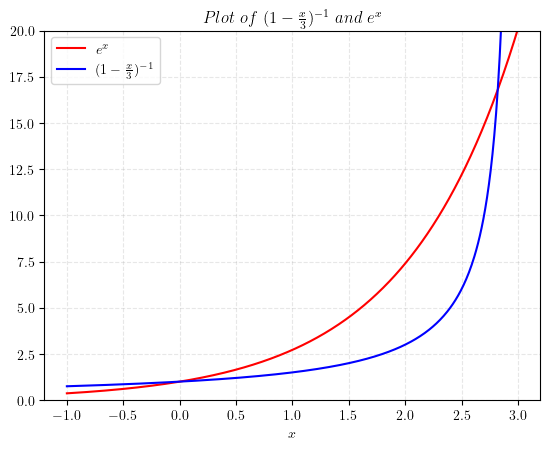

In [14]:
x = np.linspace(-1,2.999,500)
f = [np.exp(x),1/(1-x/3)]
plt.plot(x,f[0],label=r'$e^x$',color='red')
plt.plot(x,f[1],label=r'$(1-\frac{x}{3})^{-1}$',color='blue')
plt.xlabel(r'$x$')
plt.ylim(0,20)
plt.title(r'$Plot \ of \ (1-\frac{x}{3})^{-1} \ and \ e^x$')
plt.grid(True,alpha=0.3,linestyle='--')
plt.legend()

1. optimize newton

$$ x_{max}= \frac{\hbar \omega_{max}}{k_B T} = \frac{\hbar 2\pi c}{k_B T \lambda_{max}} \\$$

$$\lambda_{max} T = \frac{\hbar 2\pi c}{k_B x_{max}} = \frac{hc}{k_B x_{max}}$$

$ \lambda_{max} T $ of Frequency version 

In [15]:
x = np.linspace(-7,7,500)

def f(x): return np.exp(x) - (1-(x/3))**-1
x_greiner = np.round(optimize.newton(f,2.999),6)
lambda_T_newton = c2/x_greiner
print(f'newton method: {x_greiner:4f}')
print(f'wien\'s law(Frequency version): {lambda_T_newton:4f} um.K')

newton method: 2.821439
wien's law(Frequency version): 5099.525455 um.K


why?

### numercial calculate for found wien constant

$$ e_b(\lambda, T) = C_1 \lambda^{-5} (e^{\frac{C_2}{\lambda T}} - 1)^{-1} $$

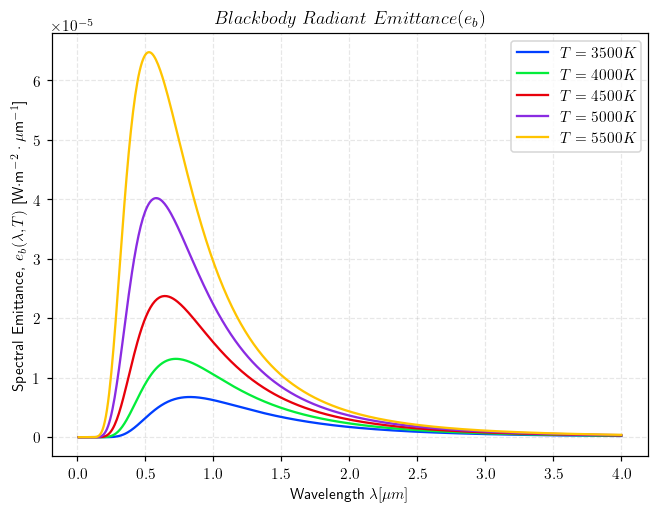

In [16]:
Temp = [3500,4000,4500,5000,5500]

landa = np.linspace(0.01,4,500)
plt.figure(figsize=(7,5),dpi=110)

for i in Temp:
    exponent = c2 / (landa * i)
    Eb = c1 / (landa**5 * (np.exp(exponent) - 1))
    plt.plot(landa,Eb,label=rf'$T={i}K$')
plt.xlabel(r'Wavelength $\lambda[\mu m]$')
plt.ylabel(r'Spectral Emittance, $e_b(\lambda, T)$ [W$\cdot$m$^{-2}\cdot\mu$m$^{-1}$]')
plt.title(r'$Blackbody \ Radiant \ Emittance (e_b)$')
plt.legend()
plt.grid(True,alpha=0.3,linestyle='--')


plot u($\lambda$)

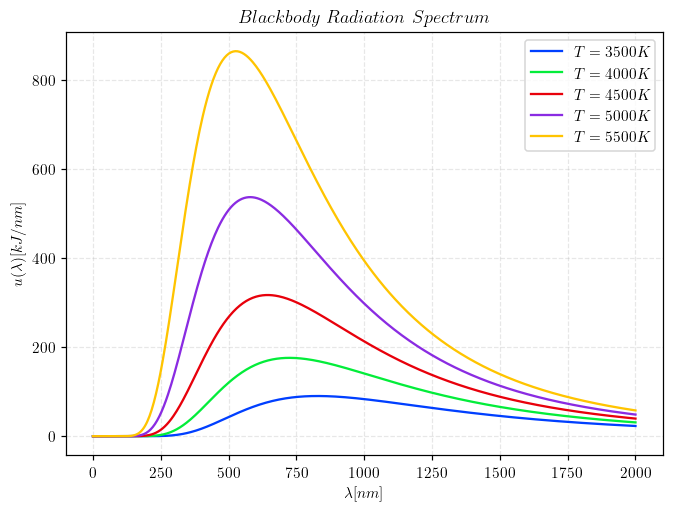

In [17]:
landa = np.linspace(0.1, 2000, 500) * 1e-9

plt.figure(figsize=(7,5),dpi=110)
for i in Temp:
    alpha = 8*np.pi*h*c
    beta = (h*c)/(landa*k*i)
    
    # for stop overflow warning in exp ( thanks grok4 :) )
    beta = np.clip(beta, None, 700)
    exp_term = np.expm1(beta) 

    u = (alpha/(pow(landa,5)*(np.exp(beta) - 1))) * 1e-3
    plt.plot(landa*1e9 , u, label=rf'$T={i}K$')

plt.xlabel(r'$\lambda[nm]$')
plt.ylabel(r'$u(\lambda)[kJ/nm]$')
plt.title(r'$Blackbody \ Radiation \ Spectrum$')
plt.grid(True,alpha=0.3,linestyle='--')
plt.legend()

inflection points

In [18]:
Lamda, T, x = sp.symbols('Lamda T x', positive=True, real=True) 
C1, C2 = sp.symbols('C1 C2', positive=True, real=True)
eb = C1*Lamda**(-5) / (sp.exp(C2/(Lamda*T)) - 1)
d_eb = sp.diff(eb,Lamda)
d_eb = sp.simplify(d_eb)
display(d_eb)
d2_eb = sp.diff(d_eb, Lamda).as_numer_denom()[0].subs(C2 / (Lamda*T),x)
display(sp.simplify(d2_eb))
main2 = d2_eb / (-C1*T**3*Lamda**24*(sp.exp(C2/(T*Lamda)) - 1)**5)
display(sp.simplify(main2))
eq4 = sp.simplify(main2).as_numer_denom()[0]
display(eq4)
eq5 = eq4 / (1-sp.exp(x))**5
display(eq5)
eq6 = (eq5.subs(Lamda*T,C2/x) / (C2**2 / x**2))
display(sp.simplify(eq6))
eq7 = sp.simplify(eq6).as_numer_denom()[0]
display(sp.simplify(eq7))
eq8 = eq7.subs(-x**2*sp.exp(2*x)+12*x*sp.exp(2*x)-30*sp.exp(2*x),sp.exp(2*x)*(-x**2+12*x-30))
display(eq8)
eq9 = eq8.subs(-x**2*sp.exp(x)-12*x*sp.exp(x)+60*sp.exp(x),sp.exp(x)*(-x**2-12*x+60))
display(eq9)

C1*(C2*exp(C2/(Lamda*T)) + 5*Lamda*T*(1 - exp(C2/(Lamda*T))))/(Lamda**7*T*(1 - exp(C2/(Lamda*T)))**2)

C1*Lamda**18*T**3*(1 - exp(x))**4*(-2*C2*(C2*exp(x) + 5*Lamda*T*(1 - exp(x)))*exp(x) - 7*Lamda*T*(1 - exp(x))*(C2*exp(x) + 5*Lamda*T*(1 - exp(x))) - (1 - exp(x))*(C2**2*exp(x) - 5*C2*Lamda*T*exp(x) - 5*Lamda**2*T**2*(1 - exp(x))))

(exp(x) - 1)**4*(2*C2*(C2*exp(x) - 5*Lamda*T*(exp(x) - 1))*exp(x) - 7*Lamda*T*(C2*exp(x) - 5*Lamda*T*(exp(x) - 1))*(exp(x) - 1) - (exp(x) - 1)*(C2**2*exp(x) - 5*C2*Lamda*T*exp(x) + 5*Lamda**2*T**2*(exp(x) - 1)))/(Lamda**6*(exp(C2/(Lamda*T)) - 1)**5)

(exp(x) - 1)**4*(2*C2*(C2*exp(x) - 5*Lamda*T*(exp(x) - 1))*exp(x) - 7*Lamda*T*(C2*exp(x) - 5*Lamda*T*(exp(x) - 1))*(exp(x) - 1) - (exp(x) - 1)*(C2**2*exp(x) - 5*C2*Lamda*T*exp(x) + 5*Lamda**2*T**2*(exp(x) - 1)))

(exp(x) - 1)**4*(2*C2*(C2*exp(x) - 5*Lamda*T*(exp(x) - 1))*exp(x) - 7*Lamda*T*(C2*exp(x) - 5*Lamda*T*(exp(x) - 1))*(exp(x) - 1) - (exp(x) - 1)*(C2**2*exp(x) - 5*C2*Lamda*T*exp(x) + 5*Lamda**2*T**2*(exp(x) - 1)))/(1 - exp(x))**5

-(x**2*exp(2*x) + x**2*exp(x) - 12*x*exp(2*x) + 12*x*exp(x) + 30*exp(2*x) - 60*exp(x) + 30)/(exp(x) - 1)

-x**2*exp(2*x) - x**2*exp(x) + 12*x*exp(2*x) - 12*x*exp(x) - 30*exp(2*x) + 60*exp(x) - 30

-x**2*exp(x) - 12*x*exp(x) + (-x**2 + 12*x - 30)*exp(2*x) + 60*exp(x) - 30

(-x**2 - 12*x + 60)*exp(x) + (-x**2 + 12*x - 30)*exp(2*x) - 30

In [19]:
x_ir = sp.nsolve(eq9, x, 4)
x_il = sp.nsolve(eq9, x, 8)
lambda_Tr ,lambda_Tl= c2/x_ir , c2/x_il

print(f'Right inflection point wavelength: {lambda_Tr} um.K')
print(f'Left inflection point wavelength: {lambda_Tl} um.K')

Right inflection point wavelength: 4082.69998031653 um.K
Left inflection point wavelength: 1703.82298555571 um.K


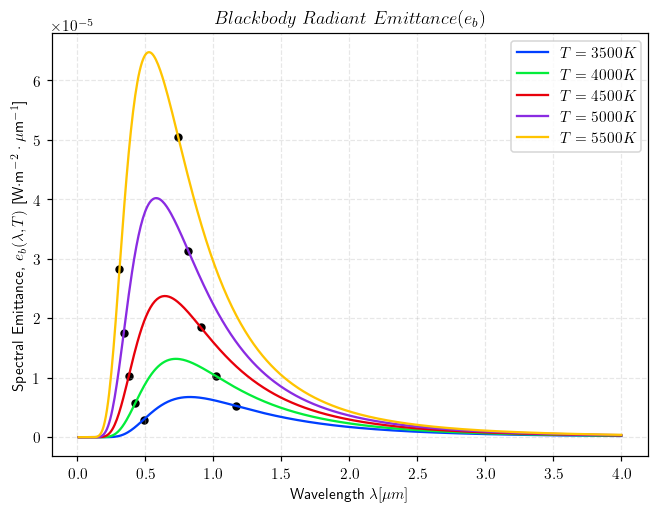

In [20]:
plt.figure(figsize=(7,5),dpi=110)
landa = np.linspace(0.01,4,500)

for i in Temp:
    exponent = c2 / (landa * i)
    Eb = c1 / (landa**5 * (np.exp(exponent) - 1))

    lambda_li = float(lambda_Tl) / i
    exp_li = c2 / (lambda_li * i)
    Eb_li = c1 / (lambda_li**5 * (np.exp(exp_li) - 1))

    lambda_ri = float(lambda_Tr) / i
    exp_ri = c2 / (lambda_ri * i)
    Eb_ri = c1 / (lambda_ri**5 * (np.exp(exp_ri) - 1))

    plt.scatter(lambda_ri, Eb_ri, color='black', s=20)
    plt.scatter(lambda_li, Eb_li, color='black', s=20)
    plt.plot(landa,Eb,label=rf'$T={i}K$')

plt.xlabel(r'Wavelength $\lambda[\mu m]$')
plt.ylabel(r'Spectral Emittance, $e_b(\lambda, T)$ [W$\cdot$m$^{-2}\cdot\mu$m$^{-1}$]')
plt.title(r'$Blackbody \ Radiant \ Emittance (e_b)$')
plt.legend()
plt.grid(True,alpha=0.3,linestyle='--')

# 2. Analysis new solution (Part 2)